# 02. Neural Network for classification with PyTorch

## 1. Make classification data and get it ready

In [1]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples=n_samples,
                    noise=0.03,
                    random_state=42)

In [2]:
print(f"First 5 samples of X: {X[:5]}")
print(f"First 5 samples of y: {y[:5]}")

First 5 samples of X: [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y: [1 1 1 1 0]


In [3]:
# Make DataFrame of circles data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
                        "X2": X[:, 1],
                        "label": y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


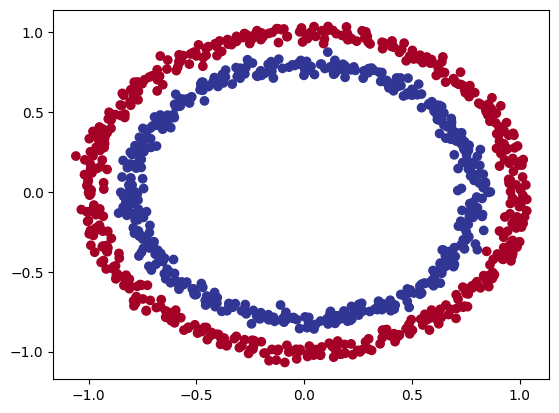

In [4]:
# Visualization
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu);

Note: The data we're working with is often referred to as a toy dataset, a dataset that is small enough to experiment but still sizeable enough to practice fundamentals.

### 1.1 Check input and output shapes

In [5]:
X.shape, y.shape

((1000, 2), (1000,))

In [6]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


### 1.2 Turn data into tensors and create train and test splits

In [7]:
import torch
torch.__version__

'2.2.2'

In [8]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [9]:
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [10]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
len(X_train), len(X_test)

(800, 200)

## 2. Building a model

Let's build a model to classify our blue and red dots.

Steps:
1. Setup device agnostic code (GPU or CPU)
2. Construct a model
3. Define a loss function and optimizer
4. Create a training and test loop

In [12]:
# Import pytorch
import torch
from torch import nn

# Make device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

Now lets create a model that:
1. Subclass `nn.Module`
2. Create 2 `nn.Linear()` layers that are capable of handling the shapes of our data
3. Defines a `forward()` method that outlines the forward pass (or forward compuation)
4. Instatiate an  instance of our model class and send it to the target `device`

In [13]:
#  Step 1. Construct a model subclass nn.Module
class CircleModelV0(nn.Module):
    def __init__(self, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        # Step 2. Create layers
        # self.layer_1 = nn.Linear(in_features=2, out_features=8)
        # self.layer_2 = nn.Linear(in_features=8, out_features=1)
        self.two_linear_layers = nn.Sequential(
            nn.Linear(in_features=2, out_features=8),
            nn.Linear(in_features=8, out_features=1)
        ).to(device)

    # step 3
    def forward(self, x):
        x = self.layer_1(x)
        # return self.layer_2(x)
        return self.two_linear_layers(x)

# step 4
model_0 =  CircleModelV0().to(device)

In [14]:
model_0

CircleModelV0(
  (two_linear_layers): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=1, bias=True)
  )
)

In [15]:
next(model_0.parameters())

Parameter containing:
tensor([[-0.5421, -0.5874],
        [-0.1198, -0.4348],
        [ 0.4361, -0.6145],
        [ 0.0618,  0.1718],
        [ 0.0267,  0.1953],
        [ 0.3795, -0.5039],
        [-0.5104,  0.6244],
        [-0.5173, -0.5194]], requires_grad=True)

In [16]:
# Lets replicate the model above using nn.Sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=8),
    nn.Linear(in_features=8, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=8, bias=True)
  (1): Linear(in_features=8, out_features=1, bias=True)
)

In [17]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.5000, -0.5120],
                      [-0.0677,  0.5711],
                      [-0.2830, -0.1548],
                      [ 0.6729,  0.5500],
                      [ 0.3836, -0.4951],
                      [-0.1645,  0.5633],
                      [ 0.0962,  0.3005],
                      [-0.0486, -0.0625]])),
             ('0.bias',
              tensor([ 0.3658, -0.0653,  0.2107, -0.4903,  0.6797, -0.6803,  0.3707, -0.6620])),
             ('1.weight',
              tensor([[-0.1440,  0.2221, -0.3073,  0.2015, -0.0785, -0.2410,  0.0919,  0.0701]])),
             ('1.bias', tensor([0.3059]))])

In [18]:
# Make predictions
with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, shape: {X_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 labels:\n{y_test[:10]}")

Length of predictions: 200, shape: torch.Size([200, 1])
Length of test samples: 200, shape: torch.Size([200, 2])

First 10 predictions:
tensor([[ 0.2577],
        [ 0.4519],
        [-0.1233],
        [ 0.3651],
        [ 0.0798],
        [ 0.1967],
        [ 0.5825],
        [ 0.5232],
        [-0.1313],
        [ 0.4671]])

First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


## 2.1 Setup loss function and optimizer

Which loss function or optmizer should you use?

For regression, yo might want MAE or MSE.
For classification, you might want binary cross entropy or categorical cross entropy (cross entropy).

Lectures:
* https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a
* https://datascience.stackexchange.com/questions/31041/what-does-logits-in-machine-learning-mean
* https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html

And for optimizers, two of the most common and useful are SGD and Adam.

In [19]:
# setup loss function
# loss_fn = nn.BCELoss() # Requires inputs to have gone through the sigmoid activation function prior to input to BCE
loss_fn = nn.BCEWithLogitsLoss() # sigmoid activation function built-in

optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [21]:
# Calculate accuracy
# out of 100 examples, what percentage does our model get right?
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

## 3. Train model

### 3.1 Going from raw logits -> prediction probabilities -> prediction labels

Our model outputs are going to be raw **logits**

We can convert these logits into predictions probabilities by passinng them to some kind of activation function (e.g. sigmoid for binary classificaion and softmax for multiclass classification).

Then we can convert our model's prediction probabilities to prediction labels by either rounding them or taking the max.

In [20]:
# view the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test.to(device))
y_logits[:5]

tensor([[ 0.2577],
        [ 0.4519],
        [-0.1233],
        [ 0.3651],
        [ 0.0798]])

In [26]:
# Use the sigmoid activation function
y_pred_probs = torch.sigmoid(y_logits[:5])
y_pred_probs

tensor([[0.5641],
        [0.6111],
        [0.4692],
        [0.5903],
        [0.5199]])

For our prediction probabilities values, we need to perform a range-style rounding on them:
* `y_pred_probs` >= 0.5, `y=1` (class 1)
* `y_pred_probs` <>= 0.5, `y=0` (class 0)

In [27]:
#  Find the predicted labels
y_preds = torch.round(y_pred_probs)

# In full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([1., 1., 0., 1., 1.])

### 3.2 Building a training and testing loop

In [38]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put data to the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
    ### Training
    model_0.train()

    #1. Forward pass
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    # 2. Calculate loss/accuracy
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_0.eval()
    with torch.inference_mode():
        # Forward pass
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        # 2. Calculate test loss
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

    # Print out
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.5f} | Test loss: {test_loss:.5f} | Test acc: {test_acc:.5f}")


Epoch: 0 | Loss: 0.69337 | Acc: 51.50000 | Test loss: 0.69745 | Test acc: 46.50000
Epoch: 10 | Loss: 0.69327 | Acc: 51.62500 | Test loss: 0.69702 | Test acc: 46.50000
Epoch: 20 | Loss: 0.69320 | Acc: 51.62500 | Test loss: 0.69666 | Test acc: 47.00000
Epoch: 30 | Loss: 0.69314 | Acc: 51.62500 | Test loss: 0.69636 | Test acc: 46.50000
Epoch: 40 | Loss: 0.69310 | Acc: 51.25000 | Test loss: 0.69611 | Test acc: 46.00000
Epoch: 50 | Loss: 0.69307 | Acc: 51.62500 | Test loss: 0.69589 | Test acc: 46.00000
Epoch: 60 | Loss: 0.69305 | Acc: 51.75000 | Test loss: 0.69571 | Test acc: 46.50000
Epoch: 70 | Loss: 0.69303 | Acc: 51.50000 | Test loss: 0.69556 | Test acc: 46.50000
Epoch: 80 | Loss: 0.69302 | Acc: 51.62500 | Test loss: 0.69543 | Test acc: 46.50000
Epoch: 90 | Loss: 0.69301 | Acc: 51.62500 | Test loss: 0.69532 | Test acc: 47.00000
Epoch: 100 | Loss: 0.69300 | Acc: 51.75000 | Test loss: 0.69523 | Test acc: 47.50000
Epoch: 110 | Loss: 0.69300 | Acc: 51.37500 | Test loss: 0.69515 | Test acc: 

## 4. Make predictions and evaluate the model

It looks the the model is not learning...

To do so, we're going to import a function called `plot_decision_boundary()`

In [33]:
import requests
# https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py
from pathlib import Path

# Download helper functions from repository
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists... skipping")
else:
    print("Dowloading function")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

Dowloading function


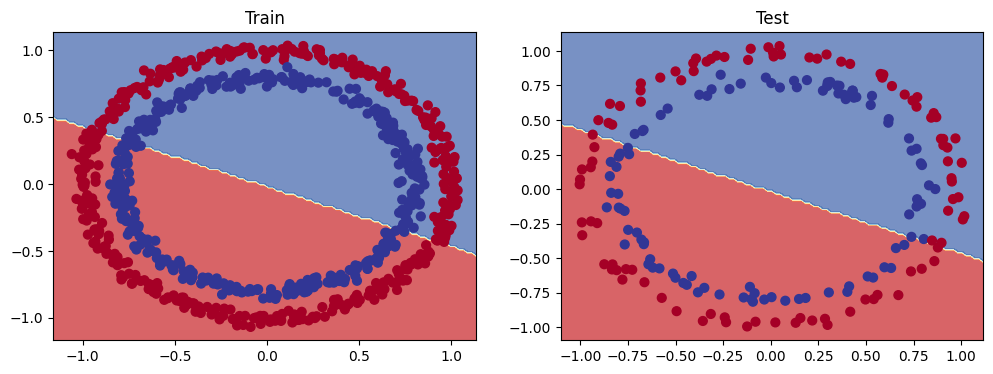

In [39]:
# Plot decision boundary
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## 5. Improving our model (from a models perspective)

* Add more layers - give the model more chances to learn about patterns in the data
* Add more hidden units - go from8 hidden units to 16 hidden layers
* Fit for longer - increment epochs
* Changing the activation function
* Change the learning rate
* Change the loss function